# **HOMEWORK**

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from Kaggle or download using wget link mentioned below:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv



# Loading the data
Use only the following columns:

- **'latitude',**

- **'longitude',**

- **'housing_median_age',**

- **'total_rooms',**

- **'total_bedrooms',**

- **'population',**

- **'households',**

- **'median_income',**

- **'median_house_value',**

- **'ocean_proximity'**

- **Fill NAs with 0.**

- **Apply the log tranform to median_house_value.**

- **Do train/validation/test split with 60%/20%/20% distribution.**

- **Use the train_test_split function and set the random_state parameter to 1.**

- **Use DictVectorizer to turn the dataframe into matrices.**

In [1]:
#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv( 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]


In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df = df.fillna(0)

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

- **Apply the log tranform to median_house_value.**


- **Do train/validation/test split with 60%/20%/20% distribution.**


- **Use the train_test_split function and set the random_state parameter to 1.**


- **Use DictVectorizer to turn the dataframe into matrices.**

In [11]:
#from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state= 1)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state= 1 )

In [12]:
len(df_test), len(df_train), len(df_val)

(4128, 12384, 4128)

In [13]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test. median_house_value.values)

In [14]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [15]:
features = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population',
            'households','median_income','ocean_proximity']

train_dict =df_train[features].to_dict(orient='records')
val_dict = df_val[features].to_dict(orient = 'records')

In [16]:
from sklearn.feature_extraction import DictVectorizer

In [17]:
dv = DictVectorizer(sparse=False)
Xtrain = dv.fit_transform(train_dict)
Xval = dv.transform(val_dict)

# Question 1
Let's train a decision tree regressor to predict the median_house_value variable.

-**Train a model with max_depth=1.**

-**Which feature is used for splitting the data?**

-**ocean_proximity=INLAND**

-**total_rooms**

-**latitude**

-**population**

In [18]:
from sklearn.tree import export_text

In [19]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(Xtrain, y_train)

DecisionTreeRegressor(max_depth=1)

In [20]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



-**Ans**: **ocean_proximity=INLAND**

# Question 2
Train a random forest model with these parameters:

- **n_estimators=10**

- **random_state=1**

- **n_jobs=-1 (optional - to make training faster)**

What's the RMSE of this model on validation?

- **0.05**
- **0.25**
- **0.55**
- **0.85**

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(Xtrain, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
y_pred = rf.predict(Xval)
np.sqrt(mean_squared_error(y_val, y_pred)).round(2)

0.25

# Question 3
Now let's experiment with the n_estimators parameter

- **Try different values of this parameter from 10 to 200 with step 10.**

- **Set random_state to 1.**

- **Evaluate the model on the validation dataset.**

- **After which value of n_estimators does RMSE stop improving?**



- **10**

- **50**

- **70**

- **150**

In [25]:
from tqdm.auto import tqdm

In [26]:
scores = []

for t in tqdm(range(10, 200, 10)):
    rf = RandomForestRegressor(n_estimators=t, random_state=1, n_jobs=-1)
    rf.fit(Xtrain, y_train)
    
    y_pred = rf.predict(Xval)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((t, score))
df_scores = pd.DataFrame(scores, columns= ['n_estimator', 'rmse'])

  0%|          | 0/19 [00:00<?, ?it/s]

In [27]:
df_scores.sort_values(by= 'rmse', ascending = False)#.round(3)


,n_estimator,rmse
0,10,0.245738
1,20,0.239262
2,30,0.235717
3,40,0.234583
4,50,0.233104
5,60,0.232843
7,80,0.232527
6,70,0.232384
8,90,0.232215
9,100,0.231968


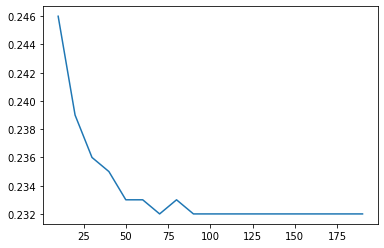

In [28]:
plt.plot(df_scores.n_estimator, df_scores.rmse.round(3))

**Ans: 50**

# Question 4
Let's select the best max_depth:

-**Try different values of max_depth: [10, 15, 20, 25]**


-**For each of these values, try different values of n_estimators from 10 till 200 (with step 10)**

-**Fix the random seed: random_state=1**

What's the best max_depth:

-**10**

-**15**

-**20**

-**25**

In [29]:
for m in tqdm([10, 15, 20, 25]):
    rf = RandomForestRegressor(n_estimators=0,
                               max_depth=m, 
                               random_state=1, n_jobs= -1,
                               warm_start= True)
    
    for n in tqdm(range(10, 200, 10)):
        rf.n_estimators=n
        rf.fit(Xtrain, y_train)
        
        y_pred = rf.predict(Xval)
        score = np.sqrt(mean_squared_error(y_val, y_pred))
        
        scores.append((m, n, score))
        
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns = columns)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [30]:
df_scores.sort_values(by = 'rmse', ascending= False)

,max_depth,n_estimators,rmse
19,10,10.000000,0.255042
20,10,20.000000,0.252784
21,10,30.000000,0.251647
22,10,40.000000,0.251062
23,10,50.000000,0.250192
...,...,...,...
14,150,0.231694,NaN
15,160,0.231697,NaN
16,170,0.231629,NaN
17,180,0.231790,NaN


In [31]:
df_scores

,max_depth,n_estimators,rmse
0,10,0.245738,NaN
1,20,0.239262,NaN
2,30,0.235717,NaN
3,40,0.234583,NaN
4,50,0.233104,NaN
...,...,...,...
90,25,150.000000,0.231511
91,25,160.000000,0.231484
92,25,170.000000,0.231440
93,25,180.000000,0.231598


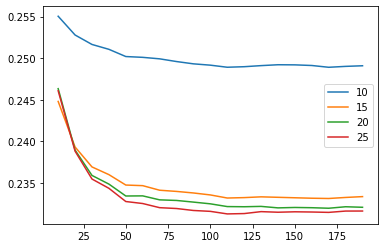

In [32]:
for m in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == m]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=m)

plt.legend()

**Ans: The best max_depth  is 10**

# Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- **Train the model with these parametes:**
    - **n_estimators=10,**
    
    - **max_depth=20,**
    
     - **random_state=1,**
     
     - **n_jobs=-1 (optional)**
     
Get the feature importance information from this model
What's the most important feature?

- **total_rooms**

- **median_income**

- **total_bedrooms**

- **longitude**

In [33]:
rf = RandomForestRegressor(n_estimators=10,
                           max_depth= 20, random_state=1, 
                           n_jobs=-10)

rf.fit(Xtrain, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-10, random_state=1)

In [34]:
rf.feature_importances_

array([1.69573183e-02, 3.30938997e-02, 1.01333971e-01, 9.62649876e-02,
       3.62912907e-01, 3.00723750e-03, 3.10900842e-01, 3.56806263e-04,
       4.48661972e-04, 4.22762446e-03, 3.09180197e-02, 1.90412562e-02,
       2.05364687e-02])

In [35]:
df_imp = pd.DataFrame()
df_imp['features'] = dv.get_feature_names()
df_imp['importance'] = rf.feature_importances_
df_imp

,features,importance
0,households,0.016957
1,housing_median_age,0.033094
2,latitude,0.101334
3,longitude,0.096265
4,median_income,0.362913
5,ocean_proximity=<1H OCEAN,0.003007
6,ocean_proximity=INLAND,0.310901
7,ocean_proximity=ISLAND,0.000357
8,ocean_proximity=NEAR BAY,0.000449
9,ocean_proximity=NEAR OCEAN,0.004228


In [36]:
df_imp.sort_values(by='importance', ascending=False)

,features,importance
4,median_income,0.362913
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101334
3,longitude,0.096265
1,housing_median_age,0.033094
10,population,0.030918
12,total_rooms,0.020536
11,total_bedrooms,0.019041
0,households,0.016957
9,ocean_proximity=NEAR OCEAN,0.004228


**Ans: The most important feature is 'median_income'.**

# Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- **Install XGBoost**

- **Create DMatrix for train and validation**

- **Create a watchlist**

- **Train a model with these parameters for 100 rounds:**

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- **0.3**

- **0.1**

- **Both gives same**

In [37]:
features = dv.get_feature_names()
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [40]:
#using xgboost
features = dv.get_feature_names()

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(Xtrain, label=y_train, feature_names=features)
dval = xgb.DMatrix(Xval, label=y_val, feature_names=features)

In [43]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [59]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [60]:
scores = {}

In [61]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [62]:
scores['eta=0.3'] = parse_xgb_output(output)

In [63]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [64]:
scores['eta=0.1'] = parse_xgb_output(output)

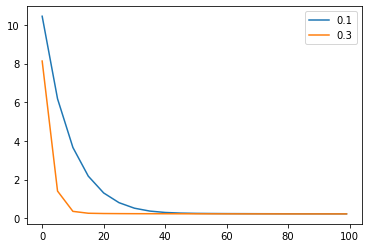

In [65]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()

#plt.ylim([0.43, 0.45])
#plt.xlim([50, 100])

**Ans: They are both good**